<a href="https://colab.research.google.com/github/Shashank-u803/BIS-Lab/blob/main/Week%204/Ant_colony_optimisation_for_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created 15 cities
Starting Ant Colony Optimization...
Iteration 10/100, Best Distance: 386.50
Iteration 20/100, Best Distance: 383.48
Iteration 30/100, Best Distance: 383.48
Iteration 40/100, Best Distance: 381.40
Iteration 50/100, Best Distance: 379.19
Iteration 60/100, Best Distance: 379.19
Iteration 70/100, Best Distance: 379.19
Iteration 80/100, Best Distance: 379.19
Iteration 90/100, Best Distance: 379.19
Iteration 100/100, Best Distance: 379.19

Optimization Complete!

BEST SOLUTION FOUND
Route: [4, np.int64(1), np.int64(7), np.int64(2), np.int64(12), np.int64(9), np.int64(0), np.int64(13), np.int64(6), np.int64(14), np.int64(5), np.int64(3), np.int64(10), np.int64(8), 11]
Total Distance: 379.19


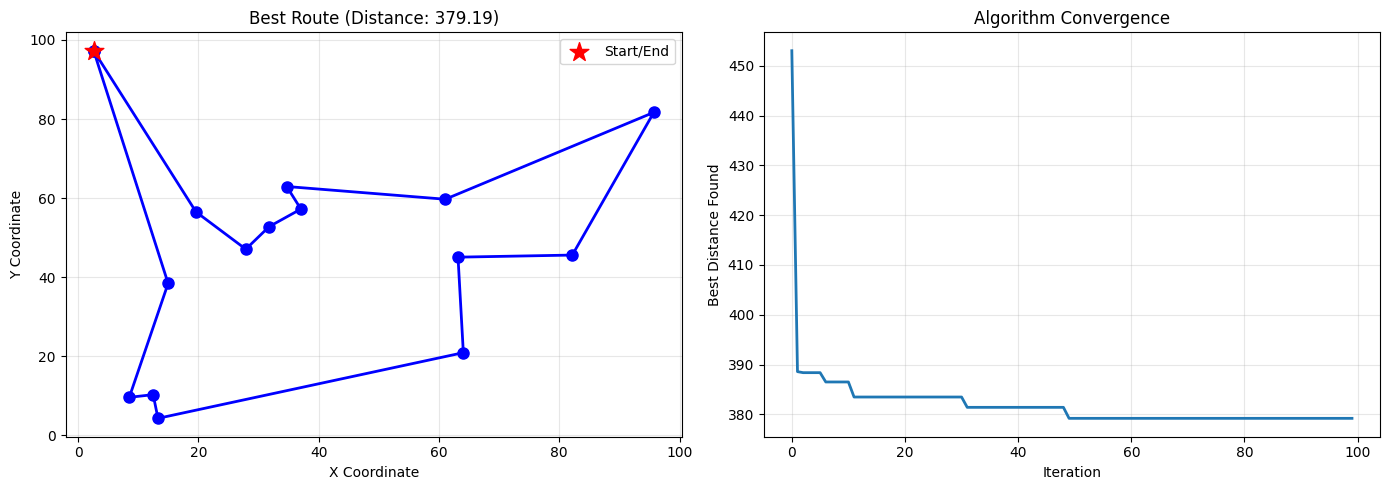

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define the Problem - Create cities with random coordinates
def create_cities(num_cities):
    """Generate random city coordinates"""
    cities = []
    for i in range(num_cities):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        cities.append((x, y))
    return cities

# Calculate Euclidean distance between two cities
def calculate_distance(city1, city2):
    """Calculate distance between two cities"""
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Create distance matrix for all cities
def create_distance_matrix(cities):
    """Build a matrix of distances between all city pairs"""
    n = len(cities)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i][j] = calculate_distance(cities[i], cities[j])
    return dist_matrix

# Step 3: Construct Solutions - Select next city probabilistically
def select_next_city(current_city, visited, pheromones, distances, alpha, beta, n_cities):
    """
    Probabilistically select next city based on pheromone and distance
    """
    # Get list of unvisited cities
    unvisited = [i for i in range(n_cities) if i not in visited]

    # If only one city left, return it
    if len(unvisited) == 1:
        return unvisited[0]

    # Calculate probabilities for each unvisited city
    probabilities = []
    for city in unvisited:
        # Pheromone level raised to alpha power
        pheromone = pheromones[current_city][city] ** alpha
        # Heuristic information (1/distance) raised to beta power
        heuristic = (1.0 / distances[current_city][city]) ** beta
        # Combined probability
        probabilities.append(pheromone * heuristic)

    # Normalize probabilities to sum to 1
    probabilities = np.array(probabilities)
    probabilities = probabilities / probabilities.sum()

    # Select next city based on probabilities
    next_city = np.random.choice(unvisited, p=probabilities)
    return next_city

# Construct a complete tour for one ant
def construct_solution(n_cities, pheromones, distances, alpha, beta):
    """
    One ant constructs a complete tour
    """
    # Start from random city
    route = [random.randint(0, n_cities - 1)]

    # Visit all other cities
    while len(route) < n_cities:
        current_city = route[-1]
        next_city = select_next_city(current_city, route, pheromones, distances, alpha, beta, n_cities)
        route.append(next_city)

    return route

# Calculate total distance of a route
def calculate_route_distance(route, distances):
    """
    Calculate total distance of a route
    """
    distance = 0
    for i in range(len(route)):
        # Add distance from current city to next city
        from_city = route[i]
        to_city = route[(i + 1) % len(route)]  # Loop back to start
        distance += distances[from_city][to_city]
    return distance

# Step 4: Update Pheromones
def update_pheromones(pheromones, all_routes, all_distances, rho, q):
    """
    Update pheromone trails based on ant solutions
    """
    # Evaporate pheromones on all edges
    pheromones *= (1 - rho)

    # Add new pheromones based on ant routes
    for route, distance in zip(all_routes, all_distances):
        # Amount of pheromone to deposit (inversely proportional to distance)
        pheromone_deposit = q / distance

        # Deposit pheromone on each edge in the route
        for i in range(len(route)):
            from_city = route[i]
            to_city = route[(i + 1) % len(route)]
            # Add pheromone to both directions
            pheromones[from_city][to_city] += pheromone_deposit
            pheromones[to_city][from_city] += pheromone_deposit

    return pheromones

# Step 5 & 6: Main ACO algorithm
def solve_tsp_aco(cities, n_ants=20, n_iterations=100, alpha=1.0, beta=2.0, rho=0.5, q=100):
    """
    Main ACO algorithm to solve TSP
    """
    print("Starting Ant Colony Optimization...")

    # Step 2: Initialize Parameters
    n_cities = len(cities)
    distances = create_distance_matrix(cities)
    pheromones = np.ones((n_cities, n_cities)) * 0.1  # Initial pheromone

    # Track best solution
    best_route = None
    best_distance = float('inf')
    distance_history = []

    # Main iteration loop
    for iteration in range(n_iterations):
        # Store routes and distances for all ants
        all_routes = []
        all_distances = []

        # Each ant constructs a solution
        for ant in range(n_ants):
            route = construct_solution(n_cities, pheromones, distances, alpha, beta)
            distance = calculate_route_distance(route, distances)
            all_routes.append(route)
            all_distances.append(distance)

            # Update best solution if current is better
            if distance < best_distance:
                best_distance = distance
                best_route = route

        # Update pheromones based on all ant solutions
        pheromones = update_pheromones(pheromones, all_routes, all_distances, rho, q)

        # Track progress
        distance_history.append(best_distance)

        # Print progress every 10 iterations
        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}/{n_iterations}, Best Distance: {best_distance:.2f}")

    print("\nOptimization Complete!")
    return best_route, best_distance, distance_history

# Visualize the solution
def plot_solution(cities, best_route, best_distance, distance_history):
    """
    Visualize the best route found
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Best route
    route_cities = [cities[i] for i in best_route]
    route_cities.append(route_cities[0])  # Close the loop
    x_coords = [city[0] for city in route_cities]
    y_coords = [city[1] for city in route_cities]

    ax1.plot(x_coords, y_coords, 'b-o', linewidth=2, markersize=8)
    ax1.scatter([cities[best_route[0]][0]],
               [cities[best_route[0]][1]],
               c='red', s=200, marker='*', label='Start/End', zorder=5)
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')
    ax1.set_title(f'Best Route (Distance: {best_distance:.2f})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Convergence graph
    ax2.plot(distance_history, linewidth=2)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Best Distance Found')
    ax2.set_title('Algorithm Convergence')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create 15 random cities
    num_cities = 15
    cities = create_cities(num_cities)
    print(f"Created {num_cities} cities")

    # Solve TSP using ACO
    best_route, best_distance, distance_history = solve_tsp_aco(
        cities=cities,
        n_ants=20,          # Number of ants
        n_iterations=100,   # Number of iterations
        alpha=1.0,          # Pheromone importance
        beta=2.0,           # Distance importance
        rho=0.5,            # Evaporation rate
        q=100               # Pheromone deposit constant
    )

    # Display results
    print("\n" + "="*50)
    print("BEST SOLUTION FOUND")
    print("="*50)
    print(f"Route: {best_route}")
    print(f"Total Distance: {best_distance:.2f}")
    print("="*50)

    # Visualize solution
    plot_solution(cities, best_route, best_distance, distance_history)